<a href="https://colab.research.google.com/github/85honesty/Mini_Project/blob/main/Mini_sticker_Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 카메라 스티커앱 만들기
- 이미지 `png파일 선호`
- 배경이 없는 png 파일을 사용하는 것이 `휠씬 빠르고 간편`합니다.
- `png(Portable Network Graphics)` 파일로, `무손실 압축`을 사용하기 때문에 `이미지 손실이 없고 고품질 이미지를 생성`하여 이미지 편집에 많이 사용되는 파일입니다.
- `png 파일은 배경이 투명해서 배경 이미지 위에 png 파일을 얹어 두 이미지를 자연스럽게 합성`시킬 수 있습니다.

In [160]:
# 구글 마운트 시작(구글 드라이브 연동)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
import io
from io import BytesIO

In [162]:
# 이미지 출력
from google.colab.patches import cv2_imshow

In [163]:
imageFile = '/content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker/images/Korea_face/dailyman_lmage.png'
 
img_bgr = cv2.imread(imageFile)

In [164]:
type(img_bgr)

numpy.ndarray

In [165]:
img_bgr.shape

(224, 224, 3)

In [166]:
img_bgr

array([[[133, 132, 141],
        [134, 133, 142],
        [135, 134, 143],
        ...,
        [122, 123, 133],
        [121, 122, 132],
        [122, 123, 133]],

       [[132, 131, 140],
        [131, 133, 141],
        [134, 133, 142],
        ...,
        [121, 123, 133],
        [122, 123, 133],
        [121, 123, 133]],

       [[128, 131, 136],
        [128, 132, 137],
        [130, 133, 138],
        ...,
        [120, 125, 134],
        [121, 123, 133],
        [120, 125, 134]],

       ...,

       [[162, 167, 176],
        [158, 163, 172],
        [154, 159, 168],
        ...,
        [ 86,  89,  87],
        [111, 116, 114],
        [121, 126, 124]],

       [[161, 166, 175],
        [157, 162, 171],
        [153, 158, 167],
        ...,
        [ 79,  82,  80],
        [107, 112, 110],
        [120, 125, 123]],

       [[159, 164, 173],
        [156, 161, 170],
        [153, 158, 167],
        ...,
        [ 75,  78,  76],
        [104, 109, 107],
        [120, 125, 123]]

OpenCV의 채널 순서
---
- OpenCV를 통해 영상(이미지)를 다룰 때의 채널 순서는 B G R
- matplotlib은 R G B 순서

---
- 문서에 따르면 이미지 읽기의 flag는 다음 3가지가 있습니다. 순서대로 1, 0, -1의 값을 갖습니다.

- cv2.IMREAD_COLOR : 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값입니다.

- cv2.IMREAD_GRAYSCALE : 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용합니다.

- cv2.IMREAD_UNCHANGED : 이미지파일을 alpha channel까지 포함하여 읽어 들입니다.

- cv2.imread('img.png', 0)이라고 호출했다면 이미지를 Grayscale로 읽어 들이겠다는 뜻입니다. 실제로 이미지 읽기 flag를 바꿔가면서 이미지가 어떻게 출력되는지 확인해 보세요.

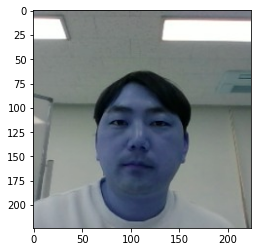

In [167]:
# 디폴트 값이 bgr로 되어 있고 색상값이 블루계열로 나옴 : 기본값이 B G R이여서 이렇게 됨
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_show)
plt.show()

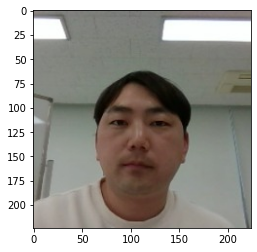

In [168]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [169]:
print(img_show[:, :, 0])
print(img_show[:,:,0].shape)

[[133 134 135 ... 122 121 122]
 [132 131 134 ... 121 122 121]
 [128 128 130 ... 120 121 120]
 ...
 [162 158 154 ...  86 111 121]
 [161 157 153 ...  79 107 120]
 [159 156 153 ...  75 104 120]]
(224, 224)


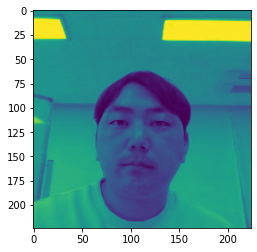

In [170]:
# R 레드 채널만 보기
plt.imshow(img_show[:, :, 0])
plt.show()

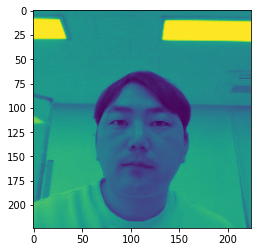

In [171]:
# G 그린 채널만 보기
plt.imshow(img_show[:, :, 1])
plt.show()

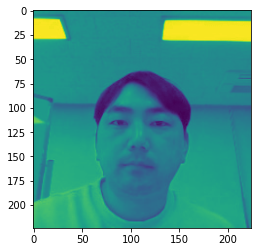

In [172]:
# B 블루 채널만 보기
plt.imshow(img_show[:, :, 2])
plt.show()

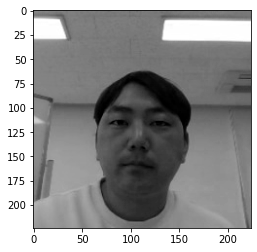

In [173]:
# R 레드 채널만 보기 + color map : 회색 gray  적용
plt.imshow(img_show[:, :, 0], cmap='gray') #cmap : color map
plt.show()

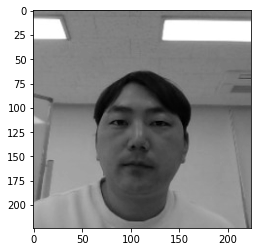

In [174]:
# G 그린 채널만 보기 + color map : 회색 gray  적용
plt.imshow(img_show[:, :, 1], cmap='gray') #cmap : color map
plt.show()

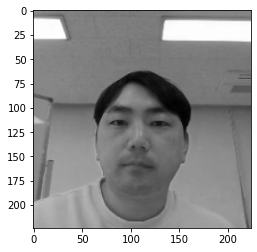

In [175]:
# B 블루 채널만 보기 + color map : 회색 gray  적용
plt.imshow(img_show[:, :, 2], cmap='gray') #cmap : color map
plt.show()

In [176]:
# R 채널 분포 확인
pic_red = img_rgb.copy()
pic_red[:, :, 1] = 0
pic_red[:, :, 2] = 0

In [177]:
pic_red

array([[[141,   0,   0],
        [142,   0,   0],
        [143,   0,   0],
        ...,
        [133,   0,   0],
        [132,   0,   0],
        [133,   0,   0]],

       [[140,   0,   0],
        [141,   0,   0],
        [142,   0,   0],
        ...,
        [133,   0,   0],
        [133,   0,   0],
        [133,   0,   0]],

       [[136,   0,   0],
        [137,   0,   0],
        [138,   0,   0],
        ...,
        [134,   0,   0],
        [133,   0,   0],
        [134,   0,   0]],

       ...,

       [[176,   0,   0],
        [172,   0,   0],
        [168,   0,   0],
        ...,
        [ 87,   0,   0],
        [114,   0,   0],
        [124,   0,   0]],

       [[175,   0,   0],
        [171,   0,   0],
        [167,   0,   0],
        ...,
        [ 80,   0,   0],
        [110,   0,   0],
        [123,   0,   0]],

       [[173,   0,   0],
        [170,   0,   0],
        [167,   0,   0],
        ...,
        [ 76,   0,   0],
        [107,   0,   0],
        [123,   0,   0]]

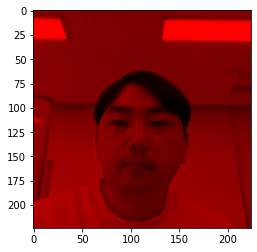

In [178]:
plt.imshow(pic_red)
plt.show()

In [179]:
pic_green = img_rgb.copy()
pic_green[:, :, 0] = 0
pic_green[:, :, 2] = 0

In [180]:
print(pic_green)

[[[  0 132   0]
  [  0 133   0]
  [  0 134   0]
  ...
  [  0 123   0]
  [  0 122   0]
  [  0 123   0]]

 [[  0 131   0]
  [  0 133   0]
  [  0 133   0]
  ...
  [  0 123   0]
  [  0 123   0]
  [  0 123   0]]

 [[  0 131   0]
  [  0 132   0]
  [  0 133   0]
  ...
  [  0 125   0]
  [  0 123   0]
  [  0 125   0]]

 ...

 [[  0 167   0]
  [  0 163   0]
  [  0 159   0]
  ...
  [  0  89   0]
  [  0 116   0]
  [  0 126   0]]

 [[  0 166   0]
  [  0 162   0]
  [  0 158   0]
  ...
  [  0  82   0]
  [  0 112   0]
  [  0 125   0]]

 [[  0 164   0]
  [  0 161   0]
  [  0 158   0]
  ...
  [  0  78   0]
  [  0 109   0]
  [  0 125   0]]]


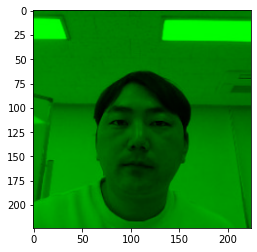

In [181]:
plt.imshow(pic_green)
plt.show()

In [182]:
pic_blue = img_rgb.copy()
pic_blue[:, :, 0] = 0
pic_blue[:, :, 1] = 0

In [183]:
pic_blue

array([[[  0,   0, 133],
        [  0,   0, 134],
        [  0,   0, 135],
        ...,
        [  0,   0, 122],
        [  0,   0, 121],
        [  0,   0, 122]],

       [[  0,   0, 132],
        [  0,   0, 131],
        [  0,   0, 134],
        ...,
        [  0,   0, 121],
        [  0,   0, 122],
        [  0,   0, 121]],

       [[  0,   0, 128],
        [  0,   0, 128],
        [  0,   0, 130],
        ...,
        [  0,   0, 120],
        [  0,   0, 121],
        [  0,   0, 120]],

       ...,

       [[  0,   0, 162],
        [  0,   0, 158],
        [  0,   0, 154],
        ...,
        [  0,   0,  86],
        [  0,   0, 111],
        [  0,   0, 121]],

       [[  0,   0, 161],
        [  0,   0, 157],
        [  0,   0, 153],
        ...,
        [  0,   0,  79],
        [  0,   0, 107],
        [  0,   0, 120]],

       [[  0,   0, 159],
        [  0,   0, 156],
        [  0,   0, 153],
        ...,
        [  0,   0,  75],
        [  0,   0, 104],
        [  0,   0, 120]]

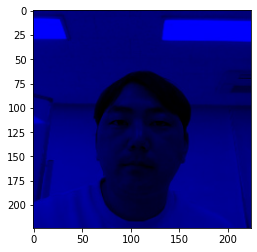

In [184]:
plt.imshow(pic_blue)
plt.show()

In [185]:
img_rgb

array([[[141, 132, 133],
        [142, 133, 134],
        [143, 134, 135],
        ...,
        [133, 123, 122],
        [132, 122, 121],
        [133, 123, 122]],

       [[140, 131, 132],
        [141, 133, 131],
        [142, 133, 134],
        ...,
        [133, 123, 121],
        [133, 123, 122],
        [133, 123, 121]],

       [[136, 131, 128],
        [137, 132, 128],
        [138, 133, 130],
        ...,
        [134, 125, 120],
        [133, 123, 121],
        [134, 125, 120]],

       ...,

       [[176, 167, 162],
        [172, 163, 158],
        [168, 159, 154],
        ...,
        [ 87,  89,  86],
        [114, 116, 111],
        [124, 126, 121]],

       [[175, 166, 161],
        [171, 162, 157],
        [167, 158, 153],
        ...,
        [ 80,  82,  79],
        [110, 112, 107],
        [123, 125, 120]],

       [[173, 164, 159],
        [170, 161, 156],
        [167, 158, 153],
        ...,
        [ 76,  78,  75],
        [107, 109, 104],
        [123, 125, 120]]

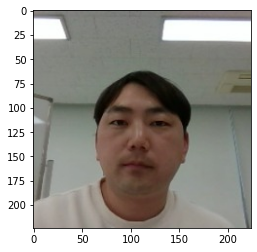

In [186]:
plt.imshow(img_rgb)
plt.show()

In [187]:
img_show

array([[[133, 132, 141],
        [134, 133, 142],
        [135, 134, 143],
        ...,
        [122, 123, 133],
        [121, 122, 132],
        [122, 123, 133]],

       [[132, 131, 140],
        [131, 133, 141],
        [134, 133, 142],
        ...,
        [121, 123, 133],
        [122, 123, 133],
        [121, 123, 133]],

       [[128, 131, 136],
        [128, 132, 137],
        [130, 133, 138],
        ...,
        [120, 125, 134],
        [121, 123, 133],
        [120, 125, 134]],

       ...,

       [[162, 167, 176],
        [158, 163, 172],
        [154, 159, 168],
        ...,
        [ 86,  89,  87],
        [111, 116, 114],
        [121, 126, 124]],

       [[161, 166, 175],
        [157, 162, 171],
        [153, 158, 167],
        ...,
        [ 79,  82,  80],
        [107, 112, 110],
        [120, 125, 123]],

       [[159, 164, 173],
        [156, 161, 170],
        [153, 158, 167],
        ...,
        [ 75,  78,  76],
        [104, 109, 107],
        [120, 125, 123]]

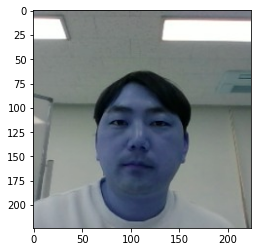

In [188]:
plt.imshow(img_show)
plt.show()

# 얼굴 검출(face detection)
- Object detection 기술을 이용해서 얼굴의 위치
- dlib의 face detector는 HOG(Histogram of Oriented Gradients)와 SVM(Support Vector Machine)을 사용해서 얼굴을 찾습니다.
- HOG는 이미지에서 색상의 변화량을 나타낸 것입니다. 딥러닝이 나오기 이전에 다양하게 사용되던 방식인데요. 이미지에서 단순히 색상값만 가지고 할 수 있는 일이 제한적이었기 때문에 색상의 변화량을 계산한 HOG는 굉장히 큰 도움이 되었습니다. 이미지로부터 물체의 특징만 잘 잡아내는 능력을 갖출 수 있었거든요. 2000년대 초반에도 얼굴을 인식해 카메라 초점을 잡는 기능 등에는 모두 이 방식이 응용되었습니다.

---
- SVM은 선형 분류기입니다.
- 한 이미지를 다차원 공간의 한 벡터라고 보면 여러 이미지는 여러 벡터가 될텐데요. 
- 이 여러 벡터를 잘 구분짓는 방법입니다. 
- 여기서는 얼굴이냐 아니냐를 구분하는 것이 중요하겠죠.

In [189]:
pip install dlib

In [190]:
import dlib

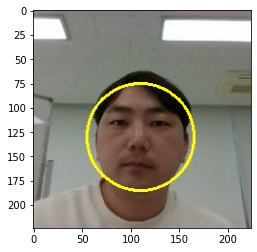

In [222]:
# 원형 그리기로 적용해보기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img = img_rgb
# img = cv2.circle(img ,(시작좌표), (종료좌표), 반지름, (색상표값 R, G, B),(선의 두께))
img = cv2.circle(img, (110, 130), 55, (255, 258, 0), 2)

plt.imshow(img)
plt.show()


In [191]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [194]:
img_rgb = img
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(66, 96) (155, 186)]]


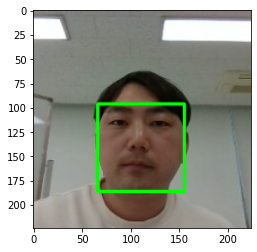

In [193]:
# # 찾은 얼굴 영역 박스 리스트
# # 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 얼굴 랜드마크 face landmark
- 앞서 말씀 드린 것처럼 스티커를 섬세하게 적용하기 위해서는 이목구비의 위치를 아는 것이 중요합니다. 이목구비의 위치를 추론하는 것을 face landmark localization 기술이라고 합니다. face landmark는 detection 의 결과물인 bounding box 로 잘라낸(crop) 얼굴 이미지를 이용합니다.

- Object keypoint estimation 알고리즘

- Face landmark와 같이 객체 내부의 점을 찾는 기술을 object keypoint estimation이라고 합니다.
- keypoint를 찾는 알고리즘은 크게 2가지로 나누어 집니다.

top-down : bounding box를 찾고 box 내부의 keypoint를 예측

bottom-up : 이미지 전체의 keypoint를 먼저 찾고 point 관계를 이용해 군집화 해서 box 생성

Dlib landmark localization
---
잘라진 얼굴 이미지에서 아래 68개의 이목구비 위치를 찾습니다.

![Dlib에 사용 되는 랜드마크 순서](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png)

- 이 때 점의 개수는 데이터셋과 논문마다 다릅니다. 예를 들면, AFLW 데이터셋은 21개를 사용하고 ibug 300w 데이터셋은 68개를 사용합니다.

![Landmark 데이터셋 요약](https://d3s0tskafalll9.cloudfront.net/media/images/E-8-9.max-800x600.png)




In [262]:
pip install imutils

In [263]:
pip install opencv-python

In [264]:
# !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
# !mv shape_predictor_68_face_landmarks.dat.bz2 모델저장할경로(models폴더)
# !cd models가있는폴더위치 && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [265]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat.bz2 /content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker/models
!cd /content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

--2022-05-03 04:31:08--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  18.7MB/s    in 3.6s    

2022-05-03 04:31:12 (16.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


- 폴더의 위치한 파일을 바로 사용하려고 하였으나 어떤 문제 인지 안되었다.
- 다음에도 다시 도전해봐야 할 문제다.
- Q. 폴더 설정이 안되어서 그런건가?

In [266]:
model_path = '/content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [267]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


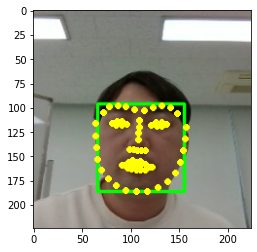

In [268]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [276]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(108, 133)
(x,y) : (108,88)
(w,h) : (90,90)


In [277]:
sticker_path = '/content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker/models/king.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(90, 90, 3)


In [278]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (63,-2)


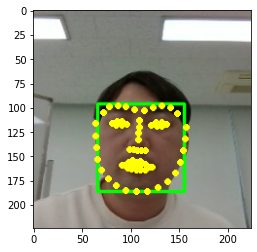

In [279]:
plt.imshow(img_show_rgb)
plt.show()

In [281]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (63,0)


In [282]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


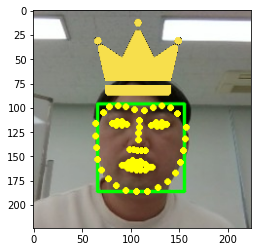

In [283]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

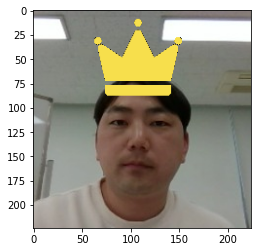

In [284]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [285]:
sticker_path_1 = '/content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker/models/laurel_wreath.png'
img_sticker = cv2.imread(sticker_path_1) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(90, 90, 3)


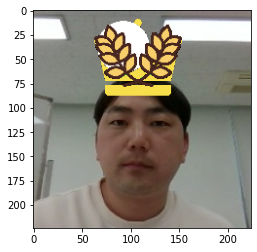

In [286]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

[문제점]
---
- 월계관만 해보려고 했는데 겹쳐서 된 것 같고 또 흰색 원형부분이 나타나는 것이 문제 점이다.

- 기존 이미지가 월계관에 원형분이 포함되어 있습니다.
- 이미지 확인 필요

[궁금증]
---
- 이미지를 삭제 하고 다른 이미지를 입힐 수 있나?
- 스티커 이미지를 바꾸면 되겠지만 그렇게 말고 스티커가 입혀진 상태에서 다른 스티커로 전환하는 걸 해보고 싶다.


[해결방안 모색]
---

[Reference]
- aiffel ex3. 스티커 앱 만들기
- [유튜브 - 이수안컴퓨터연구소](https://www.youtube.com/watch?v=XiwA10RfbDk)